In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

/Users/MattKasle/Matt/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [22]:
%matplotlib inline

In [28]:
import seaborn as sns

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [5]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [7]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [10]:
input_data = df[["Ground Temperature"]]
chirps_sec = df["Chirps/Second"]

In [18]:
regr = linear_model.LinearRegression()

regr.fit(input_data, chirps_sec)
print('Coefficients: \n', regr.coef_)
print('Y-Intercept: \n', regr.intercept_)
linear_equation = "y = {}x + {}".format(regr.coef_[0].round(2), regr.intercept_.round(2))
print(linear_equation)

Coefficients: 
 [ 0.20299973]
Y-Intercept: 
 0.459314645236
y = 0.2x + 0.46


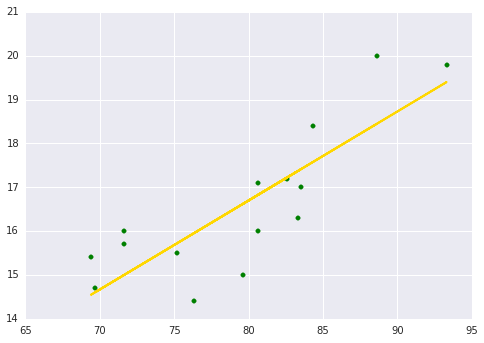

In [30]:
plt.scatter(input_data, chirps_sec,  color='green')
plt.plot(input_data, regr.predict(input_data), color='gold', linewidth=2)

In [40]:
score = regr.score(input_data, chirps_sec)
print(('Variance Score: %.2f' % score))

Variance Score: 0.69


The line is a fairly good fit for the data.

Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [47]:
regr.predict(95)[0]

19.744289128968745

Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [53]:
# 18 = 0.2x + 0.46
temp = (18 - .46) / .2
print("""If crickets were chirping at a rate of 18 chirps, 
then the approx ground temp would be {}""".format(temp))


If crickets were chirping at a rate of 18 chirps, 
then the approx ground temp would be 87.69999999999999


## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [55]:
df = pd.read_fwf("brain_body.txt")

In [76]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [72]:
input_data = df[["Body"]]
brain_weight = df["Brain"]
regr = linear_model.LinearRegression()
regr.fit(input_data, brain_weight)
coef = regr.coef_[0]
y_intercept = regr.intercept_
linear_equation = "y = {}x + {}".format(regr.coef_[0].round(3), regr.intercept_.round(3))
print(linear_equation)

y = 0.903x + -56.856


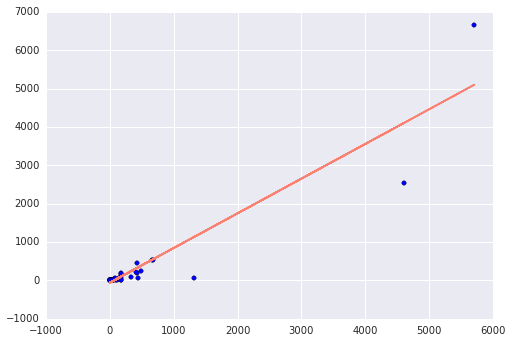

In [81]:
plt.scatter(input_data, brain_weight)
plt.plot(input_data, regr.predict(input_data), color="salmon")

In [83]:
regr.score(input_data, brain_weight)

0.87266208430433312

Very good variable score

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [131]:
indicators = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
indicators.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [132]:
input_data = indicators[["Sex", "Rank", "Year", "Degree", "YSdeg"]]
salary = indicators["Salary"]

In [123]:
regr = linear_model.LinearRegression()

In [156]:
regr.fit(input_data, salary)
coef = regr.coef_
y_intercept = regr.intercept_
print(coef)
print(y_intercept)

[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341  -128.79057354]
11410.1465473


In [134]:
regr.score(input_data, salary)

0.85471806744109702

In [135]:
import itertools

In [136]:
dependent_vars = list(df.columns)
dependent_vars.remove("Salary")

In [137]:
combos = list(itertools.combinations(dependent_vars, 2))
combos

[('Sex', 'Rank'),
 ('Sex', 'Year'),
 ('Sex', 'Degree'),
 ('Sex', 'YSdeg'),
 ('Rank', 'Year'),
 ('Rank', 'Degree'),
 ('Rank', 'YSdeg'),
 ('Year', 'Degree'),
 ('Year', 'YSdeg'),
 ('Degree', 'YSdeg')]

In [146]:
choices = []

def regression_for(combo):
    combo = list(combo)
    df = indicators.loc[:, combo + ['Salary']]
    df.dropna(inplace=True)
    input_data = df[combo]
    salary = df['Salary']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, salary)
    return regr, regr.score(input_data, salary)

for combo in combos:
    regr, score = regression_for(combo)
    choices.append((combo, score))
   

In [151]:
choices = sorted(choices, key=lambda x: x[1])
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)

(('Rank', 'Year'), 0.84364809332645974)


Rank and Year are the two columns with the best combined R^2 score

Does gender have an effect on salary?

In [153]:
print(choices)

[(('Sex', 'Degree'), 0.066437398420188809), (('Sex', 'Year'), 0.49113609418863879), (('Year', 'Degree'), 0.49190141490164396), (('Sex', 'YSdeg'), 0.49304792719667834), (('Degree', 'YSdeg'), 0.54096622882378753), (('Year', 'YSdeg'), 0.5782019226431887), (('Sex', 'Rank'), 0.7554917749443395), (('Rank', 'Degree'), 0.7557961688386643), (('Rank', 'YSdeg'), 0.76239481896982486), (('Rank', 'Year'), 0.84364809332645974)]


The gender coefficient is 1241.79, which means that all else being equal, being male will increase salary by $1241. Combined, gender and rank have the greatest combined effect on salary out of combinations with gender. However, the R^2 score of gender is only .06%, so alone it doesn't do much. In comparison, the R^2 score of Rank is .75.

In [157]:
input_data_sex = indicators[["Sex"]]

In [161]:
regr.fit(input_data_sex, salary)
coef = regr.coef_
y_intercept = regr.intercept_
regr.score(input_data_sex, salary)

0.063898925832880038

In [162]:
input_data_rank = indicators[["Rank"]]
regr.fit(input_data_rank, salary)
coef = regr.coef_
y_intercept = regr.intercept_
regr.score(input_data_rank, salary)

0.75253605392746314